In [1]:
import pandas_datareader as pdr 
import pandas as pd
import datetime as dt

##$1.$ data collection

In [2]:
start = '2000-01-01'
end = dt.date.today()


In [3]:
df = pdr.get_data_yahoo('AAPL', start=start, end=end)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.860883
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.788302
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.799837
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.730621
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.765229


In [5]:
import matplotlib.pyplot as plt
import numpy as np


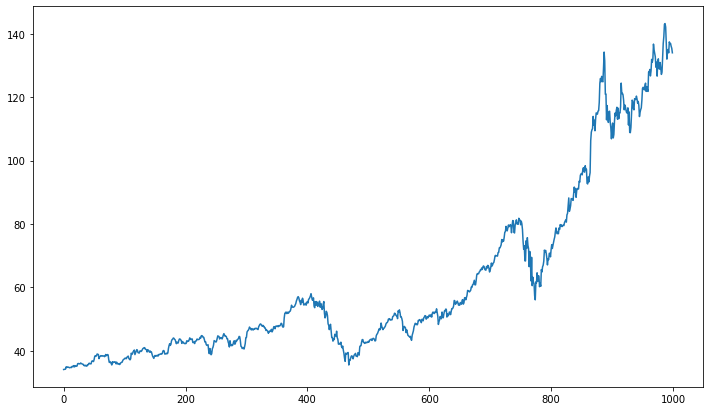

In [6]:
plt.figure(figsize=(12,7))
plt.plot(np.array(df.Close[-1000:]))
plt.show()

## $2.$ prepocessing

### $(a)$ rutines

$-1-$ typical price

In [7]:
def typical_price(df):
  temp = pd.DataFrame()
  temp['Typical'] = np.exp((3*np.log(df.Close) + 2*np.log(df.Open) + np.log(df.High) + np.log(df.Low))/7)
  temp.index = df.index
  return temp

df['Typical'] = typical_price(df)

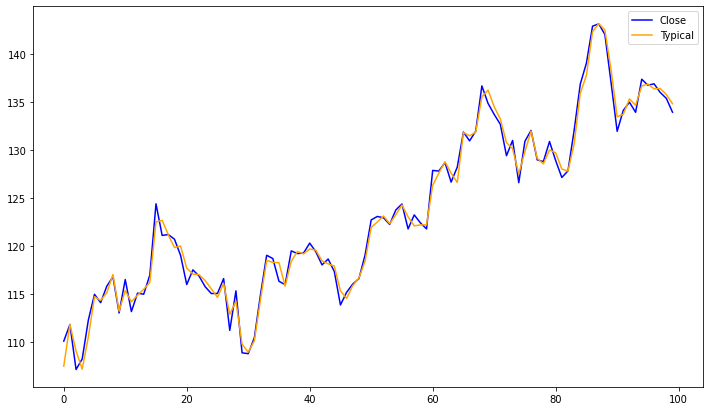

In [8]:
plt.figure(figsize=(12,7))
plt.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
plt.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
plt.legend()
plt.show()

$-2-$ Fibo

In [9]:
def fibo(col, period):
  gr = 1.61803398875
  temp = np.zeros(len(col))
  s = 0
  for i in range(period + 1): 
    temp = temp * gr + col.shift(1) 
    s = s * gr + 1
    # print(s, temp[0])
  temp = temp/s 
  return temp

df['Fibo'] = fibo(df.Typical,7)


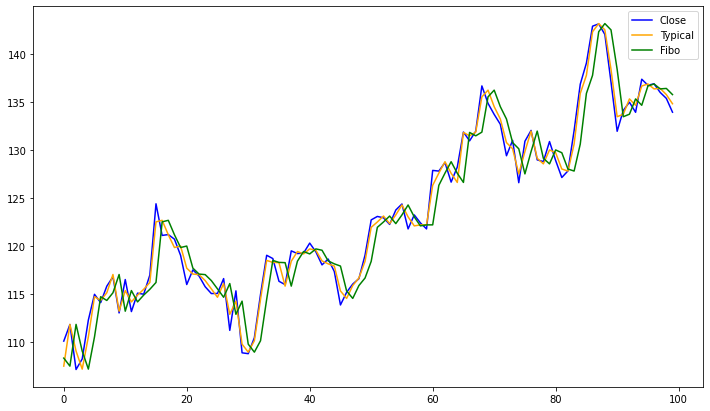

In [10]:
plt.figure(figsize=(12,7))
plt.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
plt.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
plt.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
plt.legend()
plt.show()

$-3-$ log diff bitween two columns

In [11]:
def diff2columns(c1,c2):
  temp = pd.DataFrame()
  temp = np.log(c1/c2)
  return temp

df['diff2'] = diff2columns(df.Close, df.Fibo)

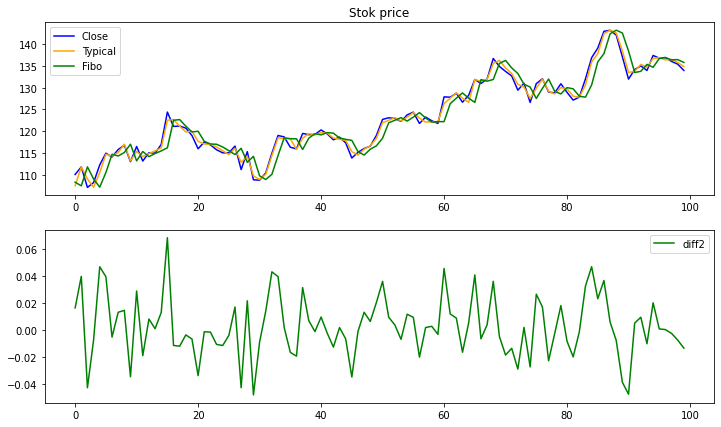

In [12]:
# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(12,7))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.legend()
ax1.set_title('Stok price')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.legend()
plt.show()

$-4-$ differents in time

In [13]:
def diff_time(col, timestep):
  temp = pd.DataFrame()
  temp['dtime'] = np.log(col/col.shift(timestep))
  return temp

df['dtime'] = diff_time(df.Fibo,1)

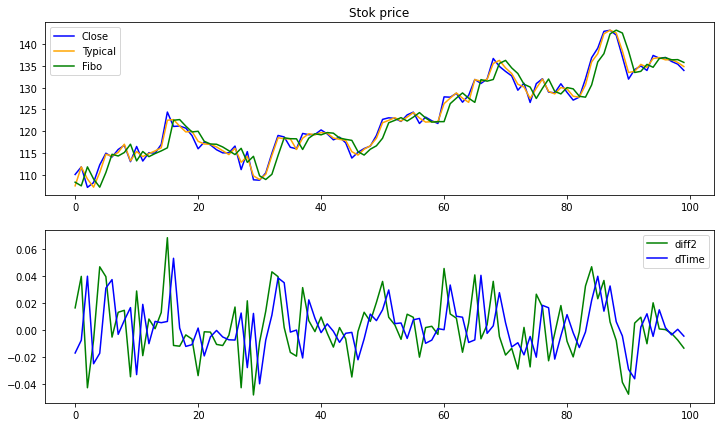

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharey=False, figsize=(12,7))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.legend()
ax1.set_title('Stok price')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.plot(np.array(df.dtime[-100:]), label = "dTime", color='blue')
ax2.legend()
plt.show()

$-5-$ log RSI

In [15]:
def logRSI(log,period):
  temp = pd.DataFrame()
  absx  = np.abs(log)
  temp['logRSI'] =log.rolling(window = period).sum()/absx.rolling(window = period).sum()
  return temp

df['logRSI'] = logRSI(df.diff2,14)

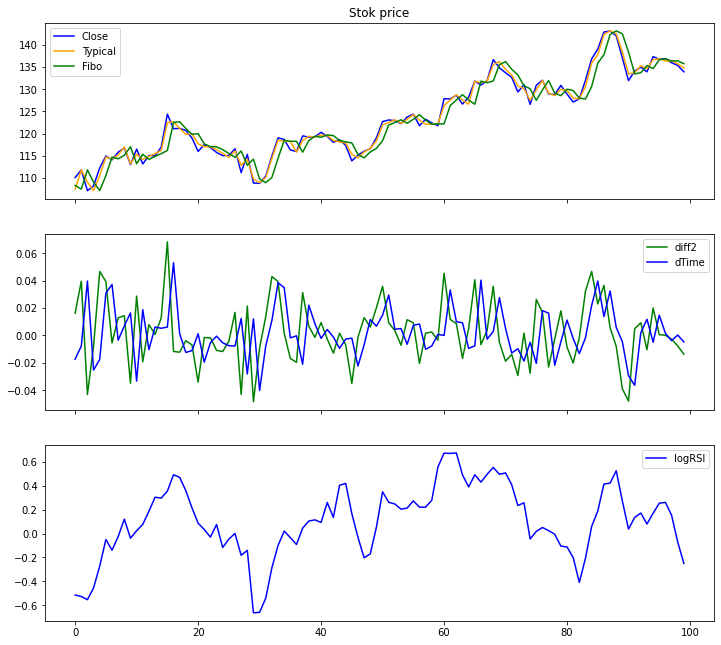

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(3,1 , sharex=True, figsize=(12,11))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.legend()
ax1.set_title('Stok price')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.plot(np.array(df.dtime[-100:]), label = "dTime", color='blue')
ax2.legend()
ax3.plot(np.array(df.logRSI[-100:]), label = "logRSI", color='blue')
ax3.legend()
plt.show()

$-6-$ target

In [17]:
def target(df, period, shift=1):
  temp = np.zeros(len(df))
  for i in range(len(df)-period - shift - 1):
    x0 = df.Close[i+shift]
    dH = df.High[i+shift:i+shift+period].max()
    dL = df.Low[i+shift:i+shift+period].min()
    d0 = (dH-dL)**2
    s = 0
    s2 =0
    for j in range(i+2, i + period + shift + 1):
      x1 = df.Close[j]
      #d1 = (df.High[j] - df.Low[j])**2
      dH = df.High[j:j+period].max()
      dL = df.Low[j:j+period].min()
      d1 = (dH-dL)**2
      if d1 + d0 == 0:
        if x1-x0 == 0: 
          y = 0
        elif x1-x0 > 0:
          y = np.pi/2
        else:
          y = -np.pi/2
      else: 
        y = (x1-x0)/np.sqrt(d0+d1)
        y = np.arctan(y)
      s = s + y
      s2 = s2 + y**2
    s = s/period
    s2 = np.sqrt((s2-period*s*s)/period)
    z = np.sin(s/s2) 
    temp[i] = z
  ave = np.abs(temp).mean()
  std = np.abs(temp).std()
  l1 = ave + std*0.75
  temp2 = np.where(temp>l1,1,np.where(temp<-l1,-1,0))
  return temp, temp2

A,B = target(df,10,0)    

In [18]:
df['target'] = A
df['class'] = B

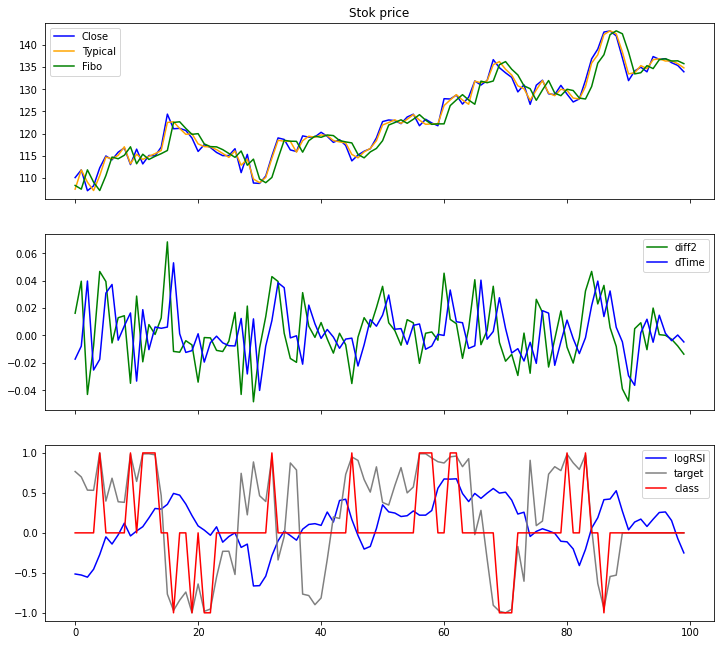

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(3,1 , sharex=True, figsize=(12,11))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.legend()
ax1.set_title('Stok price')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.plot(np.array(df.dtime[-100:]), label = "dTime", color='blue')
ax2.legend()
ax3.plot(np.array(df.logRSI[-100:]), label = "logRSI", color='blue')
ax3.plot(np.array(df.target[-100:]), label = "target", color='gray')
ax3.plot(np.array(df['class'][-100:]), label = "class", color='red')
ax3.legend()
plt.show()

$-7-$ target - II

In [20]:
def target2(col,period,shift=1):
  temp = np.zeros(len(df))
  for i in range(shift, len(col)-period-1):
    y=0
    x0 = col[i]
    if x0 != 0:
      s = 0
      s2 = 0 
      for j in range(i+1,i+period + 1):
        x1 = col[j]
        y = np.log(x1/x0)
        s = s + y 
        s2 = s2 + y**2
      s = s/period
      s2 = np.sqrt(np.abs(s2-period*s**2)/period)
      if s2 !=0:
        y = np.arctan(s/s2)
      elif s>0: 
        y = np.pi/2
      else:
        y = -np.pi/2
      y = np.sin(y)
    temp[i] = y
  temp=np.nan_to_num(temp) 
  lim = (1+np.sqrt((temp**2).mean()))/2
  temp2 = np.where(temp>lim,1,np.where(temp<-lim,-1,0))
  return temp, temp2

df['target2'], df['class2'] = target2(df.Typical,10,0)
  

In [21]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Typical',
       'Fibo', 'diff2', 'dtime', 'logRSI', 'target', 'class', 'target2',
       'class2'],
      dtype='object')

In [22]:
x = df.target2.copy()
x = np.array(x)
x = np.nan_to_num(x)
y = np.sqrt((x*x).mean())
print(y)


0.7515437548279649


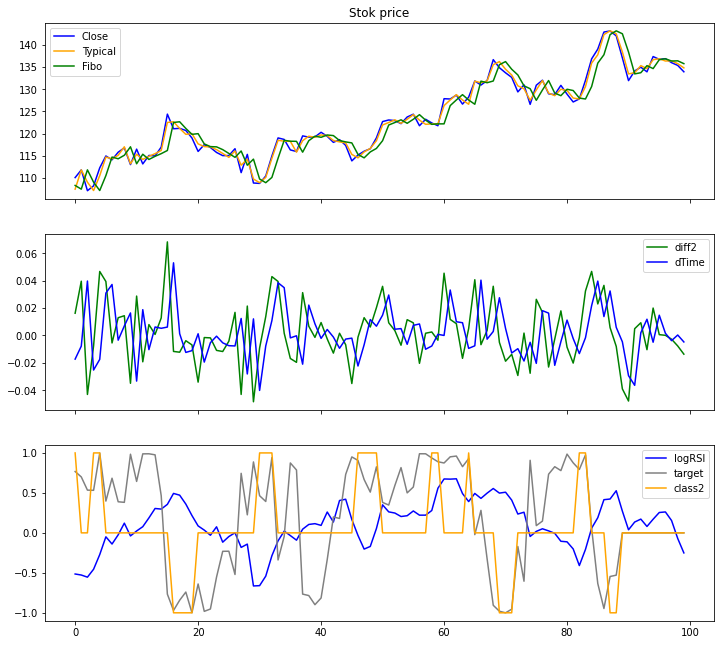

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(3,1 , sharex=True, figsize=(12,11))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.legend()
ax1.set_title('Stok price')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.plot(np.array(df.dtime[-100:]), label = "dTime", color='blue')
ax2.legend()
ax3.plot(np.array(df.logRSI[-100:]), label = "logRSI", color='blue')
ax3.plot(np.array(df.target[-100:]), label = "target", color='gray')
# ax3.plot(np.array(df['class'][-100:]), label = "class", color='red')
ax3.plot(np.array(df['class2'][-100:]), label = "class2", color='orange')
ax3.legend()
plt.show()

$-8-$ signals

In [24]:
def getsignals(col,cls):
  up = np.empty(len(col))
  down = np.empty(len(col))
  up = np.where(cls == 1, col-col.rolling(window=10).std()/2,np.nan)
  down = np.where(cls == -1, col+col.rolling(window=10).std()/2,np.nan)
  return up,down

signUp, signDown = getsignals(df.Close,df['class2'])

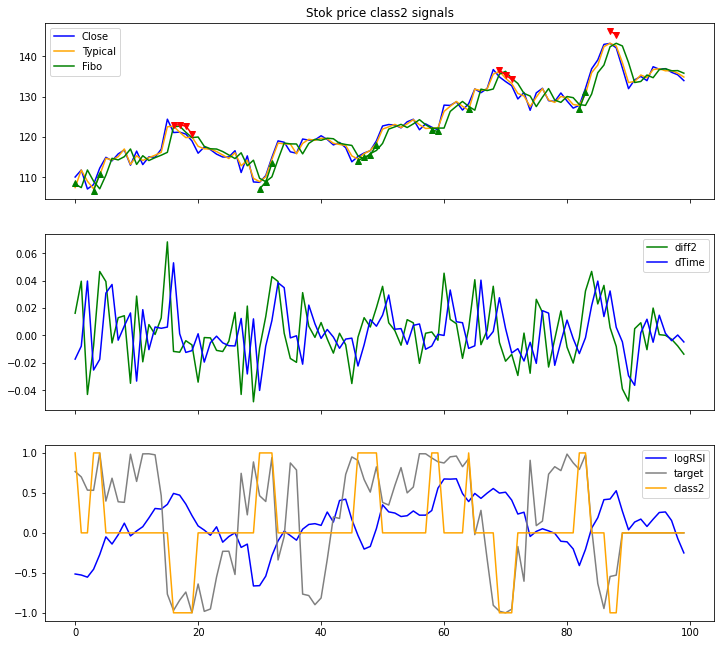

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(3,1 , sharex=True, figsize=(12,11))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.plot(signUp[-100:],marker="^",color='green')
ax1.plot(signDown[-100:],marker="v",color='red')
ax1.legend()
ax1.set_title('Stok price class2 signals')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.plot(np.array(df.dtime[-100:]), label = "dTime", color='blue')
ax2.legend()
ax3.plot(np.array(df.logRSI[-100:]), label = "logRSI", color='blue')
ax3.plot(np.array(df.target[-100:]), label = "target", color='gray')
# ax3.plot(np.array(df['class'][-100:]), label = "class", color='red')
ax3.plot(np.array(df['class2'][-100:]), label = "class2", color='orange')
ax3.legend()
plt.show()

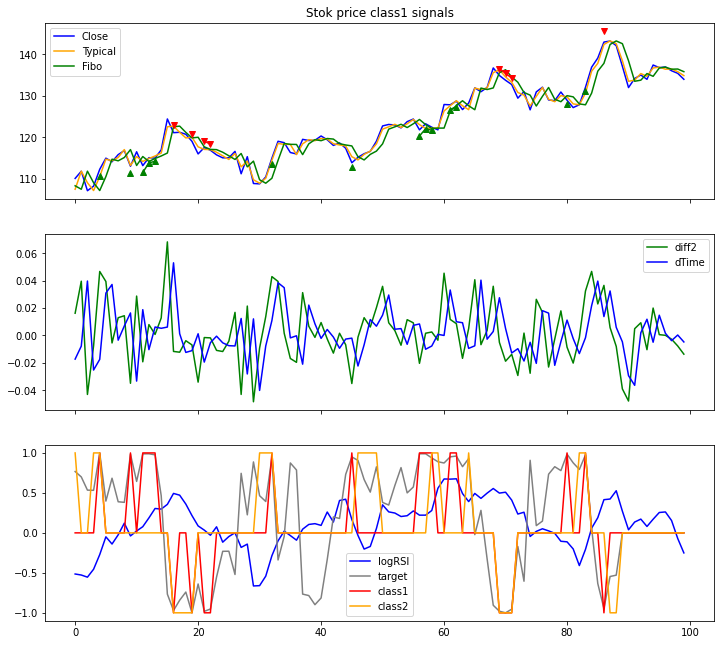

In [26]:
signUp, signDown = getsignals(df.Close,df['class'])

f, (ax1, ax2, ax3) = plt.subplots(3,1 , sharex=True, figsize=(12,11))
ax1.plot(np.array(df.Close[-100:]), label = "Close", color='blue')
ax1.plot(np.array(df.Typical[-100:]), label = "Typical", color='orange')
ax1.plot(np.array(df.Fibo[-100:]), label = "Fibo", color='green')
ax1.plot(signUp[-100:],marker="^",color='green')
ax1.plot(signDown[-100:],marker="v",color='red')
ax1.legend()
ax1.set_title('Stok price class1 signals')
ax2.plot(np.array(df.diff2[-100:]), label = "diff2", color='green')
ax2.plot(np.array(df.dtime[-100:]), label = "dTime", color='blue')
ax2.legend()
ax3.plot(np.array(df.logRSI[-100:]), label = "logRSI", color='blue')
ax3.plot(np.array(df.target[-100:]), label = "target", color='gray')
ax3.plot(np.array(df['class'][-100:]), label = "class1", color='red')
ax3.plot(np.array(df['class2'][-100:]), label = "class2", color='orange')
ax3.legend()
plt.show()

$-9-$ win, loss profile

In [27]:
def winloss(col,cls, period):
  up = np.zeros((6,period))
  down = np.zeros((6,period))

  for i in range(len(col)-1):
    sign = cls[i]
    if sign == 1 :
      x0 = col[i]
      k = 0
      for j in range(i+1,i+period+1):
        y = np.log(col[j]/x0)
        if y>0:
          l = 0 
        else:
          l = 3
        up[l,k] = up[l,k] + 1
        up[l+1,k] = up[l+1,k] +y
        up[l+2,k] = up[l+2,k] +y**2
        k = k +1
    elif sign == -1:
      x0 = col[i]
      k = 0
      for j in range(i+1,i+period+1):
        y = np.log(col[j]/x0)
        if y>0:
          l = 3 
        else:
          l = 0
        down[l,k] = down[l,k] + 1
        down[l+1,k] = down[l+1,k] +y
        down[l+2,k] = down[l+2,k] +y**2
        k = k +1
  for i in range(period):
    for j in [0,3]:
      n = up[j,i]
      up[j+1,i] = up[j+1,i]/n 
      up[j+2,i] =np.sqrt((up[j+2,i]-n*up[j+1,i]**2)/n)
      n = down[j,i]
      down[j+1,i] = down[j+1,i]/n 
      down[j+2,i] =np.sqrt((down[j+2,i]-n*down[j+1,i]**2)/n)

  return up, down


A, B = winloss(df.Close, df['class2'],10)

In [28]:
X=A
print('<table align="left">')
for i in range(6):
  if i in [0,3]:
    if i == 3: 
      print('<tr>',end=" ")
      for j in range(10):
        print("<td>  ",end="</td>")
      print('</tr>')   
    
    print('<tr>',end=" ")
    for j in range(10):
      print("<td><b>",X[i,j],end="</b></td>")
    print('</tr>')
   
  else:
    print('<tr>',end=" ")
    for j in range(10):
      print('<td>%.4f'%X[i,j],end="</td>") 
    print('</tr>')
print('</table>')

<table align="left">
<tr> <td><b> 930.0</b></td><td><b> 1013.0</b></td><td><b> 1024.0</b></td><td><b> 1026.0</b></td><td><b> 1035.0</b></td><td><b> 1035.0</b></td><td><b> 1029.0</b></td><td><b> 1023.0</b></td><td><b> 1028.0</b></td><td><b> 1002.0</b></td></tr>
<tr> <td>0.0235</td><td>0.0355</td><td>0.0444</td><td>0.0503</td><td>0.0543</td><td>0.0581</td><td>0.0603</td><td>0.0617</td><td>0.0620</td><td>0.0644</td></tr>
<tr> <td>0.0205</td><td>0.0271</td><td>0.0311</td><td>0.0346</td><td>0.0370</td><td>0.0381</td><td>0.0399</td><td>0.0418</td><td>0.0441</td><td>0.0454</td></tr>
<tr> <td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td></tr>
<tr> <td><b> 113.0</b></td><td><b> 30.0</b></td><td><b> 19.0</b></td><td><b> 17.0</b></td><td><b> 8.0</b></td><td><b> 8.0</b></td><td><b> 14.0</b></td><td><b> 20.0</b></td><td><b> 15.0</b></td><td><b> 41.0</b></td></tr>
<tr> <td>-0.0052</td><td>-0.0070</td><td>-0.0080</td><td>-0.0097</td><td>-0.

<table align="left">
<tr> <td><b> 928.0</b></td><td><b> 1011.0</b></td><td><b> 1022.0</b></td><td><b> 1024.0</b></td><td><b> 1033.0</b></td><td><b> 1033.0</b></td><td><b> 1028.0</b></td><td><b> 1021.0</b></td><td><b> 1026.0</b></td><td><b> 1000.0</b></td></tr>
<tr> <td>0.0234</td><td>0.0354</td><td>0.0443</td><td>0.0502</td><td>0.0542</td><td>0.0581</td><td>0.0603</td><td>0.0617</td><td>0.0620</td><td>0.0645</td></tr>
<tr> <td>0.0206</td><td>0.0271</td><td>0.0311</td><td>0.0346</td><td>0.0370</td><td>0.0382</td><td>0.0399</td><td>0.0419</td><td>0.0441</td><td>0.0454</td></tr>
<tr> <td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td></tr>
<tr> <td><b> 113.0</b></td><td><b> 30.0</b></td><td><b> 19.0</b></td><td><b> 17.0</b></td><td><b> 8.0</b></td><td><b> 8.0</b></td><td><b> 13.0</b></td><td><b> 20.0</b></td><td><b> 15.0</b></td><td><b> 41.0</b></td></tr>
<tr> <td>-0.0052</td><td>-0.0070</td><td>-0.0080</td><td>-0.0097</td><td>-0.0028</td><td>-0.0095</td><td>-0.0077</td><td>-0.0059</td><td>-0.0058</td><td>-0.0089</td></tr>
<tr> <td>0.0050</td><td>0.0070</td><td>0.0105</td><td>0.0112</td><td>0.0022</td><td>0.0084</td><td>0.0059</td><td>0.0070</td><td>0.0040</td><td>0.0098</td></tr>
</table>

**Class sign UP**

<table align="left">
<tr> <td><b> 692.0</b></td><td><b> 833.0</b></td><td><b> 960.0</b></td><td><b> 979.0</b></td><td><b> 984.0</b></td><td><b> 991.0</b></td><td><b> 985.0</b></td><td><b> 988.0</b></td><td><b> 982.0</b></td><td><b> 954.0</b></td></tr>
<tr> <td>0.0172</td><td>0.0223</td><td>0.0293</td><td>0.0378</td><td>0.0457</td><td>0.0530</td><td>0.0586</td><td>0.0618</td><td>0.0638</td><td>0.0677</td></tr>
<tr> <td>0.0166</td><td>0.0208</td><td>0.0237</td><td>0.0283</td><td>0.0321</td><td>0.0357</td><td>0.0393</td><td>0.0423</td><td>0.0451</td><td>0.0476</td></tr>
<tr> <td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td></tr>
<tr> <td><b> 301.0</b></td><td><b> 160.0</b></td><td><b> 33.0</b></td><td><b> 14.0</b></td><td><b> 9.0</b></td><td><b> 2.0</b></td><td><b> 8.0</b></td><td><b> 5.0</b></td><td><b> 11.0</b></td><td><b> 39.0</b></td></tr>
<tr> <td>-0.0093</td><td>-0.0077</td><td>-0.0048</td><td>-0.0033</td><td>-0.0036</td><td>-0.0050</td><td>-0.0047</td><td>-0.0024</td><td>-0.0042</td><td>-0.0062</td></tr>
<tr> <td>0.0094</td><td>0.0074</td><td>0.0055</td><td>0.0028</td><td>0.0032</td><td>0.0042</td><td>0.0026</td><td>0.0010</td><td>0.0028</td><td>0.0069</td></tr>
</table>




**Class sign Down**

<table align="left">
<tr> <td><b> 509.0</b></td><td><b> 600.0</b></td><td><b> 673.0</b></td><td><b> 690.0</b></td><td><b> 691.0</b></td><td><b> 698.0</b></td><td><b> 697.0</b></td><td><b> 695.0</b></td><td><b> 695.0</b></td><td><b> 678.0</b></td></tr>
<tr> <td>-0.0200</td><td>-0.0251</td><td>-0.0341</td><td>-0.0447</td><td>-0.0551</td><td>-0.0616</td><td>-0.0669</td><td>-0.0713</td><td>-0.0730</td><td>-0.0761</td></tr>
<tr> <td>0.0172</td><td>0.0225</td><td>0.0370</td><td>0.0495</td><td>0.0611</td><td>0.0706</td><td>0.0807</td><td>0.0851</td><td>0.0894</td><td>0.0933</td></tr>
<tr> <td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td></tr>
<tr> <td><b> 192.0</b></td><td><b> 101.0</b></td><td><b> 28.0</b></td><td><b> 11.0</b></td><td><b> 10.0</b></td><td><b> 3.0</b></td><td><b> 4.0</b></td><td><b> 6.0</b></td><td><b> 6.0</b></td><td><b> 23.0</b></td></tr>
<tr> <td>0.0104</td><td>0.0075</td><td>0.0070</td><td>0.0075</td><td>0.0043</td><td>0.0017</td><td>0.0063</td><td>0.0034</td><td>0.0082</td><td>0.0060</td></tr>
<tr> <td>0.0099</td><td>0.0082</td><td>0.0069</td><td>0.0074</td><td>0.0034</td><td>0.0018</td><td>0.0026</td><td>0.0033</td><td>0.0080</td><td>0.0038</td></tr>
</table>

**Class-2 sign UP**

<table align="left">
<tr> <td><b> 928.0</b></td><td><b> 1011.0</b></td><td><b> 1022.0</b></td><td><b> 1024.0</b></td><td><b> 1033.0</b></td><td><b> 1033.0</b></td><td><b> 1028.0</b></td><td><b> 1021.0</b></td><td><b> 1026.0</b></td><td><b> 1000.0</b></td></tr>
<tr> <td>0.0234</td><td>0.0354</td><td>0.0443</td><td>0.0502</td><td>0.0542</td><td>0.0581</td><td>0.0603</td><td>0.0617</td><td>0.0620</td><td>0.0645</td></tr>
<tr> <td>0.0206</td><td>0.0271</td><td>0.0311</td><td>0.0346</td><td>0.0370</td><td>0.0382</td><td>0.0399</td><td>0.0419</td><td>0.0441</td><td>0.0454</td></tr>
<tr> <td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td></tr>
<tr> <td><b> 113.0</b></td><td><b> 30.0</b></td><td><b> 19.0</b></td><td><b> 17.0</b></td><td><b> 8.0</b></td><td><b> 8.0</b></td><td><b> 13.0</b></td><td><b> 20.0</b></td><td><b> 15.0</b></td><td><b> 41.0</b></td></tr>
<tr> <td>-0.0052</td><td>-0.0070</td><td>-0.0080</td><td>-0.0097</td><td>-0.0028</td><td>-0.0095</td><td>-0.0077</td><td>-0.0059</td><td>-0.0058</td><td>-0.0089</td></tr>
<tr> <td>0.0050</td><td>0.0070</td><td>0.0105</td><td>0.0112</td><td>0.0022</td><td>0.0084</td><td>0.0059</td><td>0.0070</td><td>0.0040</td><td>0.0098</td></tr>
</table>

**Class-2 sign Down**

<table align="left">
<tr> <td><b> 532.0</b></td><td><b> 579.0</b></td><td><b> 586.0</b></td><td><b> 585.0</b></td><td><b> 593.0</b></td><td><b> 590.0</b></td><td><b> 594.0</b></td><td><b> 593.0</b></td><td><b> 591.0</b></td><td><b> 581.0</b></td></tr>
<tr> <td>-0.0286</td><td>-0.0434</td><td>-0.0540</td><td>-0.0605</td><td>-0.0651</td><td>-0.0690</td><td>-0.0704</td><td>-0.0726</td><td>-0.0717</td><td>-0.0725</td></tr>
<tr> <td>0.0397</td><td>0.0518</td><td>0.0633</td><td>0.0660</td><td>0.0696</td><td>0.0715</td><td>0.0751</td><td>0.0779</td><td>0.0802</td><td>0.0826</td></tr>
<tr> <td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td><td>  </td></tr>
<tr> <td><b> 66.0</b></td><td><b> 19.0</b></td><td><b> 12.0</b></td><td><b> 13.0</b></td><td><b> 5.0</b></td><td><b> 8.0</b></td><td><b> 4.0</b></td><td><b> 5.0</b></td><td><b> 7.0</b></td><td><b> 17.0</b></td></tr>
<tr> <td>0.0095</td><td>0.0077</td><td>0.0061</td><td>0.0066</td><td>0.0081</td><td>0.0046</td><td>0.0099</td><td>0.0051</td><td>0.0072</td><td>0.0090</td></tr>
<tr> <td>0.0141</td><td>0.0091</td><td>0.0040</td><td>0.0046</td><td>0.0062</td><td>0.0037</td><td>0.0063</td><td>0.0048</td><td>0.0039</td><td>0.0057</td></tr>
</table>

$-10-$ random forest loops

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random as rnd 

In [30]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Typical',
       'Fibo', 'diff2', 'dtime', 'logRSI', 'target', 'class', 'target2',
       'class2'],
      dtype='object')

In [31]:
features = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Typical',
       'Fibo', 'diff2', 'dtime', 'logRSI']
period = 10

def extendesXy(df, feautures, target, period=10): 
  #X0 = df.dropna()
  X = df[features]
  for i in range(2*period):
    for feauture in feautures: 
      X[feauture+str(i+1)] = X[feauture].shift(1+i)
  X = X.dropna()
  y = X[target].shift(-period)
  y = y.dropna()
  return X,y

X,y = extendesXy(df,features, 'Typical')
print(len(X),len(y))


5278 5268


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


__linear:__

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X[:-period], y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)

score = model.score(X_test, y_test)
pred = model.predict(X)
y_mean = (y*y).mean()
err = mean_squared_error(pred[:-period],y)
accuracy = 1-np.sqrt(err/y_mean)

score2 = np.log((np.exp(score)+np.exp(accuracy)/2))
score2 = np.sin(np.arctan(score2))
print('score: %2.5f'%score, ' accuracy: %.5f'%accuracy,'score2: %.5f'%score2)

linLimit = score2

score: 0.99120  accuracy: 0.94199 score2: 0.80986


In [33]:
def onewood(X,y,period):
  rsize = (1 + rnd.random())/4
  rstate = rnd.randint(0,50)
  X_train, X_test, y_train, y_test = train_test_split(X[:-period], y, test_size=rsize, random_state=rstate)

  rdeep = rnd.randint(2,8)
  rstate = rnd.randint(0,50)
  model = RandomForestRegressor(max_depth=rdeep, random_state=rstate).fit(X_train, y_train)

  score = model.score(X_test, y_test)
  pred = model.predict(X)
  y_mean = (y*y).mean()
  err = mean_squared_error(pred[:-period],y)
  accuracy = 1-np.sqrt(err/y_mean)

  return score, accuracy, pred


score, accuracy, pred = onewood(X,y,period)




In [34]:
score2 = np.log((np.exp(score)+np.exp(accuracy)/2))
score2 = np.sin(np.arctan(score2))
print('score: %2.5f'%score, ' accuracy: %.5f'%accuracy,'score2: %.5f'%score2)

score: 0.98362  accuracy: 0.90164 score2: 0.80617


In [35]:
Z = pd.DataFrame()
min_score = 1
id = ''
i = 0
j = 0
while i<20: 
  score, accuracy, pred = onewood(X,y,period)
  score2 = np.log((np.exp(score)+np.exp(accuracy)/2))
  score2 = np.sin(np.arctan(score2))
  if score2> linLimit:
    Z['pred'+str(i)] = pred
    if score2 < min_score:
      min_score = score2
      id = 'pred'+str(i)
    print('score: %2.5f'%score, ' accuracy: %.5f'%accuracy,'score2: %.5f'%score2,
          'min: %.5f'%min_score, 'id:', id, i,'/',j)
    i = i +1
  j = j + 1

Z = Z.drop(id, axis = 1)
print()
print('min: %.5f'%min_score,' id:', id)

score: 0.99648  accuracy: 0.95720 score2: 0.81156 min: 0.81156 id: pred0 0 / 0
score: 0.99559  accuracy: 0.95766 score2: 0.81147 min: 0.81147 id: pred1 1 / 3
score: 0.99576  accuracy: 0.95659 score2: 0.81142 min: 0.81142 id: pred2 2 / 4
score: 0.99672  accuracy: 0.96583 score2: 0.81215 min: 0.81142 id: pred2 3 / 5
score: 0.99675  accuracy: 0.96442 score2: 0.81207 min: 0.81142 id: pred2 4 / 6
score: 0.99320  accuracy: 0.94130 score2: 0.81009 min: 0.81009 id: pred5 5 / 7
score: 0.99692  accuracy: 0.96805 score2: 0.81232 min: 0.81009 id: pred5 6 / 9
score: 0.99644  accuracy: 0.96308 score2: 0.81194 min: 0.81009 id: pred5 7 / 10
score: 0.99758  accuracy: 0.97244 score2: 0.81270 min: 0.81009 id: pred5 8 / 11
score: 0.99735  accuracy: 0.97010 score2: 0.81251 min: 0.81009 id: pred5 9 / 12
score: 0.99747  accuracy: 0.96988 score2: 0.81251 min: 0.81009 id: pred5 10 / 13
score: 0.99686  accuracy: 0.96697 score2: 0.81225 min: 0.81009 id: pred5 11 / 14
score: 0.99575  accuracy: 0.95517 score2: 0.8

In [36]:
Z.columns

Index(['pred0', 'pred1', 'pred2', 'pred3', 'pred4', 'pred5', 'pred6', 'pred7',
       'pred8', 'pred9', 'pred10', 'pred11', 'pred12', 'pred13', 'pred15',
       'pred16', 'pred17', 'pred18', 'pred19'],
      dtype='object')

In [37]:
rsize = (1 + rnd.random())/4
rstate = rnd.randint(0,50)

X_train, X_test, y_train, y_test = train_test_split(Z[:-period], y, test_size=rsize, random_state=rstate)
model = LinearRegression().fit(X_train, y_train)

score = model.score(X_test, y_test)
pred = model.predict(Z)
y_mean = (y*y).mean()
err = mean_squared_error(pred[:-period],y)
accuracy = 1-np.sqrt(err/y_mean)

print('score: %.5f'%score, ' accuracy %.5f'%accuracy)


score: 0.99916  accuracy 0.97881


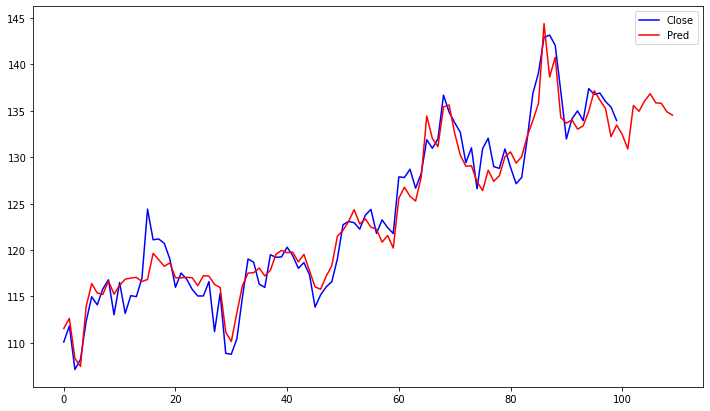

In [38]:
plt.figure(figsize=(12,7))
plt.plot(np.array(X.Close[-100:]), label = "Close", color='blue')
plt.plot(np.array(pred[-100-period:]), label = "Pred", color='red')
plt.legend()
plt.show()

In [39]:

np.corrcoef(X.Close[-1000:], pred[-1000-period:-period])

array([[1.        , 0.99869024],
       [0.99869024, 1.        ]])

In [ ]:
layers = 10
for j in range(layers):
  sm = 0  
  Z1 = pd.DataFrame()
  min_score = 1
  id = ""
  for i in range(20): 
    score, accuracy, pred = onewood(Z,y,period)
    score2 = np.log((np.exp(score)+np.exp(accuracy)/2))
    score2 = np.sin(np.arctan(score2))
    sm = sm + score2
    print('-', end='')
    Z1['pred'+str(i)] = pred
    if score2 < min_score:
      min_score = score2
      id = 'pred'+str(i)

  Z1 = Z1.drop(id, axis = 1)

  rsize = (1 + rnd.random())/4
  rstate = rnd.randint(0,50)

  X_train, X_test, y_train, y_test = train_test_split(Z1[:-period], y, test_size=rsize, random_state=rstate)
  model = LinearRegression().fit(X_train, y_train)
  pred = model.predict(Z1)

  Z = Z1.copy()
  Z['lin'] = pred
  sm = sm/20
  print('-> average: %.5f'%sm,' min: %.5f'%min_score,' id:', id)

---------------------> average: 0.81147  min: 0.79441  id: pred9
---------------------> average: 0.80725  min: 0.79268  id: pred10
---------------------> average: 0.81046  min: 0.79317  id: pred0
---------------------> average: 0.80808  min: 0.79271  id: pred14
---------------------> average: 0.81074  min: 0.79402  id: pred14
---------------------> average: 0.80918  min: 0.79257  id: pred7
---------------------> average: 0.81002  min: 0.79318  id: pred16
---------------------> average: 0.80957  min: 0.79338  id: pred10
------

In [51]:
rsize = (1 + rnd.random())/4
rstate = rnd.randint(0,50)

X_train, X_test, y_train, y_test = train_test_split(Z1[:-period], y, test_size=rsize, random_state=rstate)
model = LinearRegression().fit(X_train, y_train)

score = model.score(X_test, y_test)
pred = model.predict(Z1)
y_mean = (y*y).mean()
err = mean_squared_error(pred[:-period],y)
accuracy = 1-np.sqrt(err/y_mean)

print('score: %.5f'%score, ' accuracy %.5f'%accuracy)

score: 0.99996  accuracy 0.99504


In [52]:
np.corrcoef(df.Close[-1000:], pred[-1000-period:-period])

array([[1.        , 0.99980873],
       [0.99980873, 1.        ]])

        array([[1.       , 0.9983038],
              [0.9983038, 1.       ]])

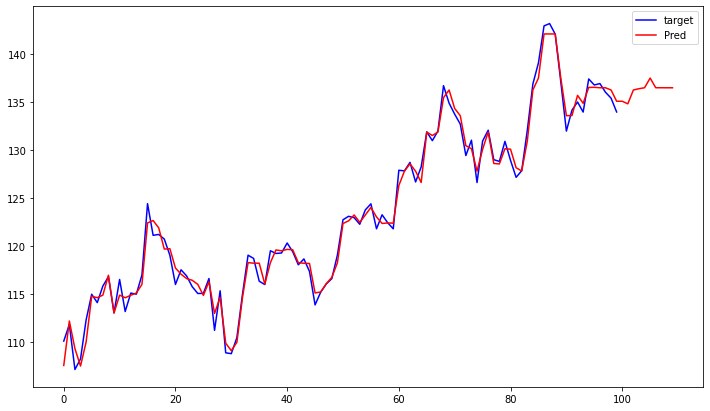

In [54]:
plt.figure(figsize=(12,7))
plt.plot(np.array(X.Close[-100:]), label = "target", color='blue')
#plt.plot(np.array(X.Typical[-100:]), label = "Typical", color='orange')
plt.plot(np.array(pred[-100-period:]), label = "Pred", color='red')
plt.legend()
plt.savefig('stock pred '+str(end)+'.jpg', dpi=300, quality=100)
plt.show()

In [55]:
print('<tr><td>',end, '</td><td>', np.round(df.Close[-1],5), end='</td><td>')
for i in range(period+1,0,-1):
  print(np.round(pred[-i],5),end='</td><td>')
print('</td></tr>')

<tr><td> 2021-02-11 </td><td> 133.9505</td><td>135.06732</td><td>135.06732</td><td>134.80285</td><td>136.24116</td><td>136.37453</td><td>136.47448</td><td>137.48446</td><td>136.47448</td><td>136.47448</td><td>136.47118</td><td>136.47118</td><td></td></tr>


### __random forest prediction for the nex 10 daya__

<table align="left">
<tr><td> date </td><td> Close</td><td>day 0</td><td>day 1</td><td>day 2</td><td>day 3</td><td>day 4</td><td>day 5</td><td>day 6</td><td>day 7</td><td>day 8</td><td>day 9</td><td>day10</td><td></td></tr>

<tr><td> 2021-01-26 </td><td> 142.47</td><td>141.91511</td><td>130.2311</td><td>127.66584</td><td>126.39237</td><td>131.47939</td><td>129.9354</td><td>127.66584</td><td>127.91954</td><td>134.99922</td><td>129.26831</td><td>130.76289</td><td></td></tr>

<tr><td> 2021-01-27 </td><td> 143.39211</td><td>142.63585</td><td>133.25496</td><td>126.44991</td><td>133.25496</td><td>130.28228</td><td>133.26526</td><td>133.25496</td><td>133.26526</td><td>133.24704</td><td>128.91347</td><td>128.79145</td><td></td></tr>

<tr><td> 2021-01-28 </td><td> 140.27921</td><td>142.03064</td><td>133.42863</td><td>135.20817</td><td>133.42276</td><td>133.42276</td><td>133.42276</td><td>133.42276</td><td>135.8335</td><td>133.42276</td><td>130.68087</td><td>128.45849</td><td></td></tr>

<tr><td> 2021-01-29 </td><td> 131.6701</td><td>133.78001</td><td>134.16916</td><td>134.21493</td><td>134.12397</td><td>134.1443</td><td>136.46672</td><td>136.46685</td><td>133.74074</td><td>131.9801</td><td>128.6935</td><td>131.7745</td><td></td></tr>

<tr><td> 2021-02-01 </td><td> 134.56</td><td>133.61534</td><td>131.37191</td><td>130.20273</td><td>133.61433</td><td>135.76932</td><td>133.60802</td><td>130.20785</td><td>128.71912</td><td>130.92568</td><td>128.71912</td><td>130.59068</td><td></td></tr>

<tr><td> 2021-02-02 </td><td> 134.92999</td><td>135.62982</td><td>130.86064</td><td>133.70303</td><td>135.62982</td><td>135.62982</td><td>130.66611</td><td>130.13873</td><td>128.13885</td><td>130.13455</td><td>130.71547</td><td>130.95021</td><td></td></tr>

<tr><td> 2021-02-03 </td><td> 133.94</td><td>134.88132</td><td>134.88132</td><td>135.70731</td><td>135.70069</td><td>135.70731</td><td>130.70913</td><td>129.83978</td><td>130.38644</td><td>133.61399</td><td>135.38659</td><td>135.70069</td><td></td></tr>

<tr><td> 2021-02-04 </td><td> 136.8</td><td>136.25145</td><td>136.25384</td><td>135.55714</td><td>135.55714</td><td>134.10745</td><td>130.78933</td><td>131.5306</td><td>133.58697</td><td>135.55714</td><td>136.25145</td><td>136.2104</td><td></td></tr>

<tr><td> 2021-02-05 </td><td> 136.69</td><td>137.60276</td><td>135.84001</td><td>133.46803</td><td>129.91041</td><td>129.8941</td><td>129.86097</td><td>129.91041</td><td>133.49149</td><td>133.46424</td><td>133.5256</td><td>133.87416</td><td></td></tr>

<tr><td> 2021-02-08 </td><td> 136.002</td><td>136.00493</td><td>133.52814</td><td>131.80039</td><td>130.1079</td><td>130.03261</td><td>133.43629</td><td>133.48625</td><td>133.50521</td><td>135.68357</td><td>136.00776</td><td>135.97035</td><td></td></tr>

<tr><td> 2021-02-09 </td><td> 136.43069</td><td>136.76283</td><td>133.5955</td><td>133.62348</td><td>130.37509</td><td>133.59227</td><td>133.5955</td><td>133.70802</td><td>136.17389</td><td>136.77392</td><td>136.77392</td><td>136.80705</td><td></td></tr>

<tr><td> 2021-02-10 </td><td> 135.17081</td><td>135.75251</td><td>133.5209</td><td>133.50493</td><td>133.50493</td><td>135.51045</td><td>136.44447</td><td>137.9108</td><td>137.9108</td><td>137.9108</td><td>137.9108</td><td>137.9108</td><td></td></tr>

<tr><td> 2021-02-11 </td><td> 133.9505</td><td>135.06732</td><td>135.06732</td><td>134.80285</td><td>136.24116</td><td>136.37453</td><td>136.47448</td><td>137.48446</td><td>136.47448</td><td>136.47448</td><td>136.47118</td><td>136.47118</td><td></td></tr>

</table>

In [56]:
len(X), len(Z)

(5278, 5278)

In [57]:
Q = X.copy()
for col in Z.columns:
  Q[col] = Z[col].values

Q.columns


Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Typical',
       'Fibo', 'diff2', 'dtime',
       ...
       'pred10', 'pred11', 'pred12', 'pred13', 'pred14', 'pred15', 'pred16',
       'pred18', 'pred19', 'lin'],
      dtype='object', length=251)

In [58]:
Q = np.round(Q,5)

In [59]:
# save dataframe as a zipped file
datafile = 'out_stock'+str(end)+'.csv'
Q.to_csv(datafile, index=False)

targetfile ='out_target'+str(end)+'.csv'
y.to_csv(targetfile, index=False)

# read from the saved zipped file
df1 = pd.read_csv(datafile)
target = pd.read_csv(targetfile)